<a href="https://colab.research.google.com/github/kiakass/DeepLearning/blob/master/mnist_conv2d_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [69]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices, onehot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [94]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
help(mnist)

Help on package tensorflow.keras.datasets.mnist in tensorflow.keras.datasets:

NAME
    tensorflow.keras.datasets.mnist - MNIST handwritten digits dataset.

PACKAGE CONTENTS


FILE
    /usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py




In [51]:
model = Sequential()

In [61]:
from tensorflow import keras
from tensorflow.keras import layers
num_classes = 10
input_shape = (28, 28, 1)

In [91]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(50, activation = 'relu', kernel_initializer='he_normal'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          73792     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

In [92]:
import time
start = time.time()  # 시작 시간 저장

batch_size = 128
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

print( "Spend time : %.3f sec" % (time.time() - start ))

Epoch 1/50
422/422 [==============================] - 2s 4ms/step - loss: 0.6203 - accuracy: 0.8007 - val_loss: 0.1182 - val_accuracy: 0.9677
Epoch 2/50
422/422 [==============================] - 2s 4ms/step - loss: 0.2339 - accuracy: 0.9300 - val_loss: 0.0695 - val_accuracy: 0.9793
Epoch 3/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1761 - accuracy: 0.9472 - val_loss: 0.0557 - val_accuracy: 0.9847
Epoch 4/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1469 - accuracy: 0.9567 - val_loss: 0.0517 - val_accuracy: 0.9853
Epoch 5/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1234 - accuracy: 0.9634 - val_loss: 0.0458 - val_accuracy: 0.9870
Epoch 6/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1052 - accuracy: 0.9688 - val_loss: 0.0478 - val_accuracy: 0.9883
Epoch 7/50
422/422 [==============================] - 2s 4ms/step - loss: 0.1005 - accuracy: 0.9703 - val_loss: 0.0420 - val_accuracy: 0.9878
Epoch 

In [86]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

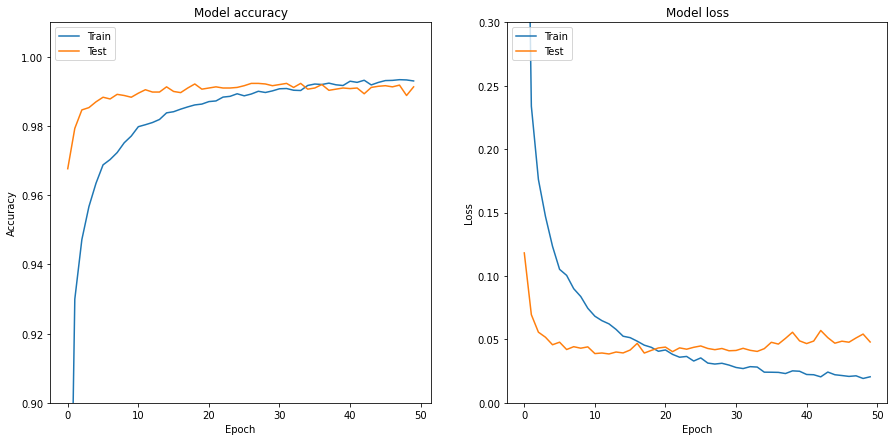

313/313 - 1s - loss: 0.0467 - accuracy: 0.9900


In [93]:
import matplotlib.pyplot as plt
#history = model.fit(x_train, y_train, validation_split=0.25, epochs=5, batch_size=100, verbose=1)
#history.val = model.fit(x_test, y_test, validation_split=0.25, epochs=50, batch_size=16, verbose=1)
plt.figure(figsize=(15,7))

# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.90,1.01)
plt.legend(['Train', 'Test'], loc='upper left')

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.0,0.3)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

history = model.evaluate(x_test,  y_test, verbose=2)

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])
